# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


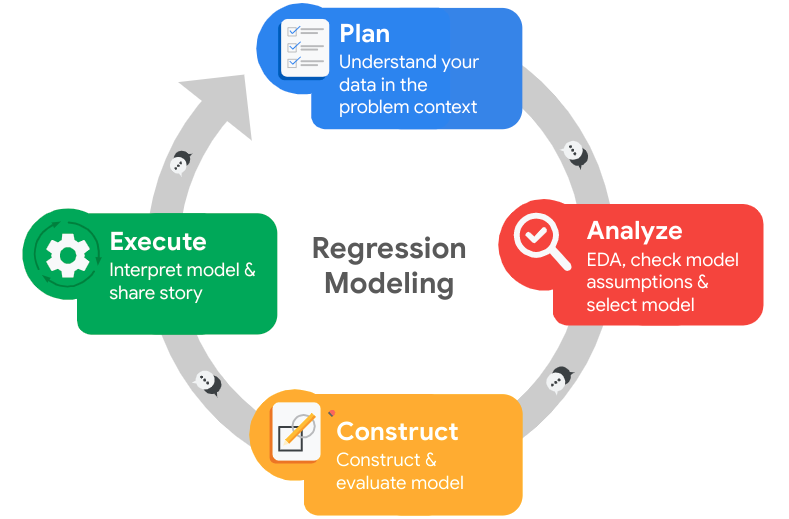

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders of this project includes senior executives, HR and the department heads.

The goal of the project is to develop a model that can help predicts the likelihood of an employee to leave the company.

Initial observations of the data:
1. There are 10 variables in the dataset
2. The dependent variable should be 'left'
3. 'Department' may not be a good predictive variable but can be useful to give a view of which department's employees are more likely to leave the company, thus drawing attention of the department head to futher investigate the issues.
4. Features engineering (extraction) maybe necessary to improve prediction power (e.g. number of project into number of project per working years
5. The dataset is large enough to seperate the dataset into subsets for training, testing and validation. This might help increase the prediction power of the model.
6. Tree-based ML model such as Random Forest or Extreme Gradient Boost Model can be used as the distribution of the data is unknown.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For data modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# For metrics
import sklearn.metrics as metrics

# For saving model
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

### Gather descriptive statistics about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###

# Change all columns to lower case
df0.rename(str.lower, axis='columns', inplace=True)

# Rename some columns
df0.rename(columns={"time_spend_company":"tenure"}, inplace=True)
df0.rename({"average_montly_hours": "average_monthly_hours", 
            "last_evaluation": "last_eval_score"}, 
           axis=1, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_eval_score', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_eval_score          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[(df0.duplicated()==True)].tail()

,satisfaction_level,last_eval_score,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0_clean = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0_clean.head()

,satisfaction_level,last_eval_score,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, "Distribution of 'tenure' box plot")

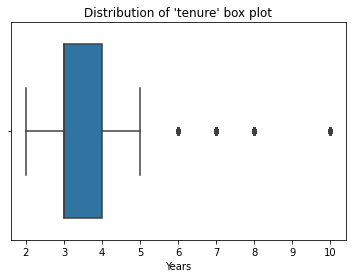

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x=df0_clean['tenure'])
plt.xlabel('Years')
plt.title("Distribution of 'tenure' box plot")


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

percentile25 = df0_clean['tenure'].quantile(0.25) # Calculate 75th percentile of annual strikes
percentile75 = df0_clean['tenure'].quantile(0.75) # Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Upper limit: ', upper_limit)
print('Lower limit: ', lower_limit)

# Count the number of outliers
outliers = df0_clean[(df0_clean['tenure'] > upper_limit) | (df0_clean['tenure'] < lower_limit)]

print('Number of rows containing outliers: ', len(outliers))



Upper limit:  5.5
Lower limit:  1.5
Number of rows containing outliers:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print("Numbers of people who left vs. stayed:")
print(df0_clean['left'].value_counts().rename(index={0: 'Stayed', 1: 'Left'}),"\n")


# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("Percentages of people who left vs. stayed:")
print(df0_clean['left'].value_counts(normalize=True).rename(index={0: 'Stayed', 1: 'Left'}))


Numbers of people who left vs. stayed:
Stayed    10000
Left       1991
Name: left, dtype: int64 

Percentages of people who left vs. stayed:
Stayed    0.833959
Left      0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [14]:
# Helper function to plot histograms
def histogrammer(data, column_str, median_text=True, **kwargs):
    median = round(data[column_str].median(), 1)
    #plt.figure(figsize=(5,3))
    ax = sns.histplot(x=data[column_str], **kwargs)
    plt.axvline(median, color='red', linestyle='--')
    if median_text==True:
        ax.text(0.1, 0.90, f'median={median}', color='red', ha='center', va='top', transform=ax.transAxes)
    else:
        print('Media: ', median)
    plt.title(f'{column_str} histogram');
        

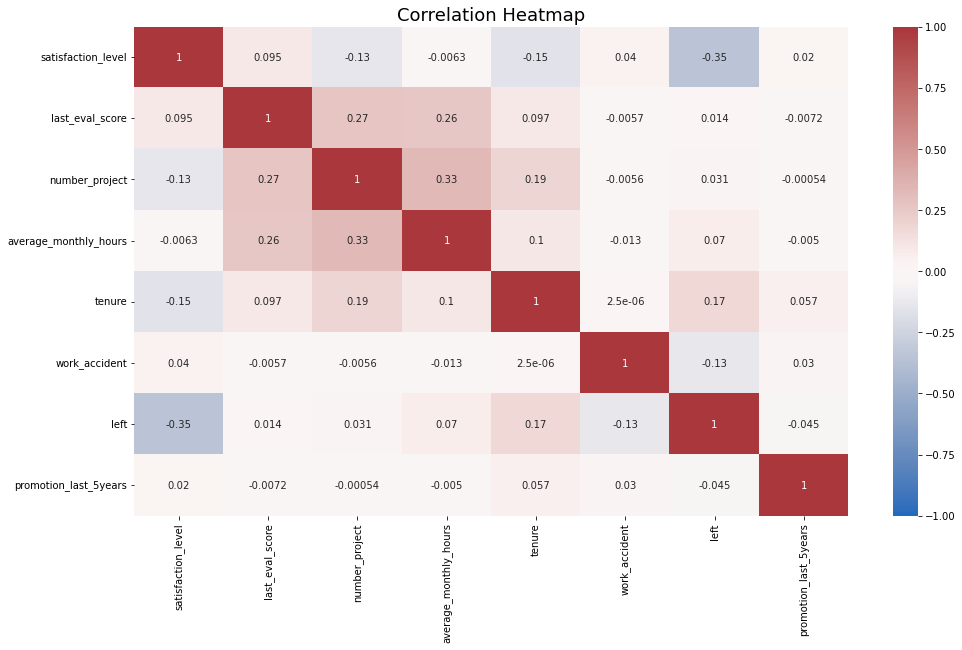

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###

# Plot a correlation heatmap among variable
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0_clean.corr(method='pearson'), 
                      vmin=-1, vmax=1, annot=True, 
                      cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontsize=18);

The heatmap shows the number of projects, monthly work hours and evaluation score have some correlation with each other. However, the correlation is not significant.
Also, whether the employee leaves is negatively correlated to their satisfaction level.

The next steps will be looking at those variables that show more correlation with each other on the heatmap, namely:
1. Number of projects vs Average monthly work hours
2. Evaluation score vs Average monthly work hours
3. Number of projects vs Evaluation score

Also, it would be interesting to see how some of the variables are relating to each other, and how they influence employee's departure:
4. Satisfaction level vs average monthly work hours
5. Tenure vs evaluation score
6. Satisfaction level vs promotion in last 5 years
7. Tenure vs salary level


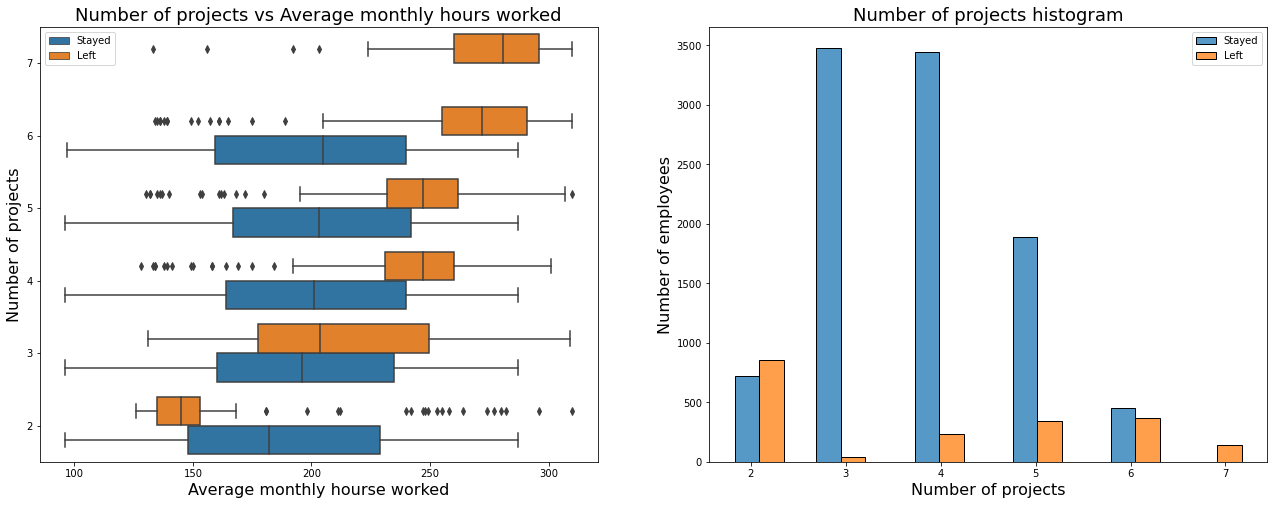

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`
sns.boxplot(data=df0_clean, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel('Average monthly hourse worked', fontsize=16)
ax[0].set_ylabel('Number of projects', fontsize=16)
ax[0].set_title('Number of projects vs Average monthly hours worked', fontsize=18)
ax[0].legend_.set_title(None)
ax[0].legend_.texts[0].set_text('Stayed')
ax[0].legend_.texts[1].set_text('Left')

# Create histogram showing distribution of `number_project`
#tenure_stay = df0_clean[df0_clean['left']==0]['number_project']
#tenure_left = df0_clean[df0_clean['left']==1]['number_project']
sns.histplot(data=df0_clean, x='number_project', hue='left', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_xlabel('Number of projects', fontsize=16)
ax[1].set_ylabel('Number of employees', fontsize=16)
ax[1].set_title('Number of projects histogram', fontsize=18)
ax[1].legend_.set_title(None)
ax[1].legend_.texts[0].set_text('Stayed')
ax[1].legend_.texts[1].set_text('Left')

plt.show()



Text(0, 0.5, 'Last evaluation score')

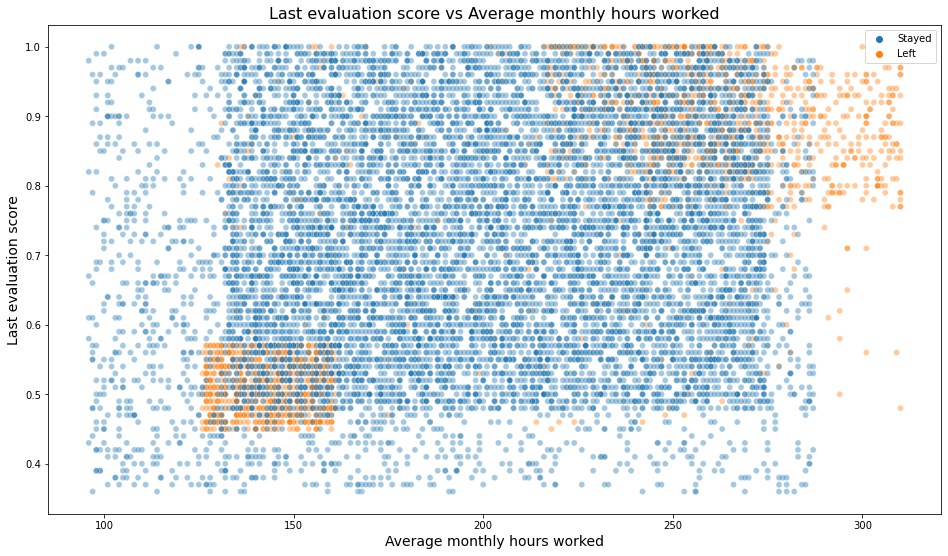

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last evaluation score`
plt.figure(figsize=(16, 9))
ax = sns.scatterplot(data=df0_clean, x='average_monthly_hours', y='last_eval_score', hue='left', alpha=0.4)
#plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
#plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Last evaluation score vs Average monthly hours worked', fontsize='16');
ax.legend_.set_title(None)
ax.legend_.texts[0].set_text('Stayed')
ax.legend_.texts[1].set_text('Left')
ax.set_xlabel('Average monthly hours worked', fontsize=14)
ax.set_ylabel('Last evaluation score', fontsize=14)



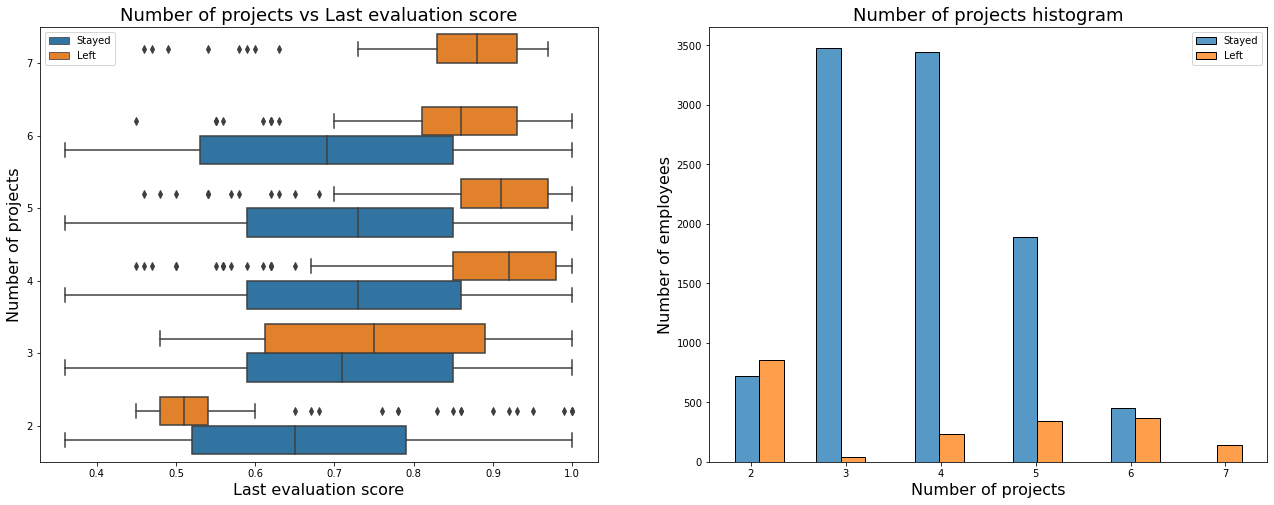

In [18]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `last_eval_score` distributions for `number_project`
sns.boxplot(data=df0_clean, x='last_eval_score', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel('Last evaluation score', fontsize=16)
ax[0].set_ylabel('Number of projects', fontsize=16)
ax[0].set_title('Number of projects vs Last evaluation score', fontsize=18)
ax[0].legend_.set_title(None)
ax[0].legend_.texts[0].set_text('Stayed')
ax[0].legend_.texts[1].set_text('Left')

# Create histogram showing distribution of `number_project`
#tenure_stay = df0_clean[df0_clean['left']==0]['number_project']
#tenure_left = df0_clean[df0_clean['left']==1]['number_project']
sns.histplot(data=df0_clean, x='number_project', hue='left', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_xlabel('Number of projects', fontsize=16)
ax[1].set_ylabel('Number of employees', fontsize=16)
ax[1].set_title('Number of projects histogram', fontsize=18)
ax[1].legend_.set_title(None)
ax[1].legend_.texts[0].set_text('Stayed')
ax[1].legend_.texts[1].set_text('Left')

plt.show()

Text(0, 0.5, 'Satisfaction level')

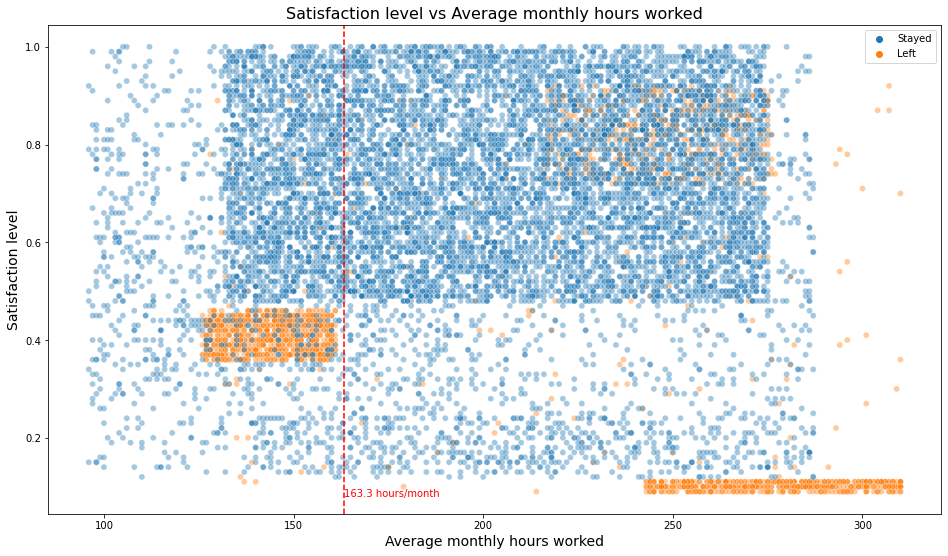

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`
plt.figure(figsize=(16, 9))
ax = sns.scatterplot(data=df0_clean, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)

# Normal working hours per month = 40 hours/week * 49 weeks / 12 months
average_working_hours = 40 * 49 / 12
plt.axvline(x=average_working_hours, color='red', label=f'{average_working_hours} hours/month', ls='--')
#plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.text(average_working_hours, 0.08, f'{average_working_hours:.1f} hours/month', color='red')
plt.title('Satisfaction level vs Average monthly hours worked', fontsize='16');
ax.legend_.set_title(None)
ax.legend_.texts[0].set_text('Stayed')
ax.legend_.texts[1].set_text('Left')
ax.set_xlabel('Average monthly hours worked', fontsize=14)
ax.set_ylabel('Satisfaction level', fontsize=14)


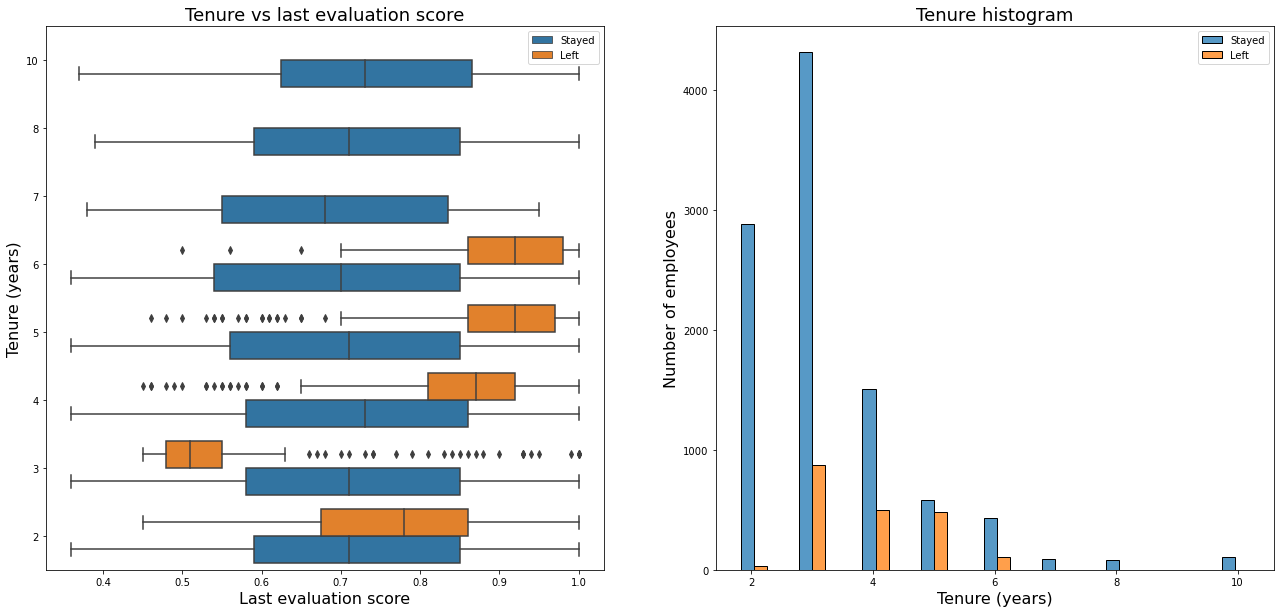

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###


# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,10))

# Create boxplot showing `last evaluation score` distributions for `tenure`
sns.boxplot(data=df0_clean, x='last_eval_score', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel('Last evaluation score', fontsize=16)
ax[0].set_ylabel('Tenure (years)', fontsize=16)
ax[0].set_title('Tenure vs last evaluation score', fontsize=18)
ax[0].legend_.set_title(None)
ax[0].legend_.texts[0].set_text('Stayed')
ax[0].legend_.texts[1].set_text('Left')

# Create histogram showing distribution of `tenure`
sns.histplot(data=df0_clean, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_xlabel('Tenure (years)', fontsize=16)
ax[1].set_ylabel('Number of employees', fontsize=16)
ax[1].set_title('Tenure histogram', fontsize=18)
ax[1].legend_.set_title(None)
ax[1].legend_.texts[0].set_text('Stayed')
ax[1].legend_.texts[1].set_text('Left')

plt.show()

Text(0, 0.5, 'Promotion in last 5 years')

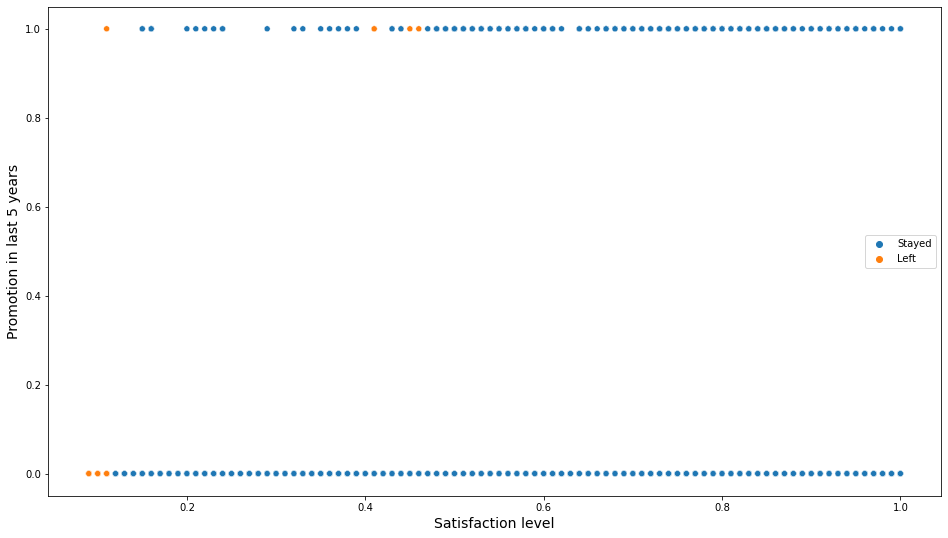

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `promotions_last_5years` versus `satisfaction_level`
plt.figure(figsize=(16, 9))
ax = sns.scatterplot(data=df0_clean, x='satisfaction_level', y='promotion_last_5years', hue='left')

ax.legend_.set_title(None)
ax.legend_.texts[0].set_text('Stayed')
ax.legend_.texts[1].set_text('Left')
ax.set_xlabel('Satisfaction level', fontsize=14)
ax.set_ylabel('Promotion in last 5 years', fontsize=14)

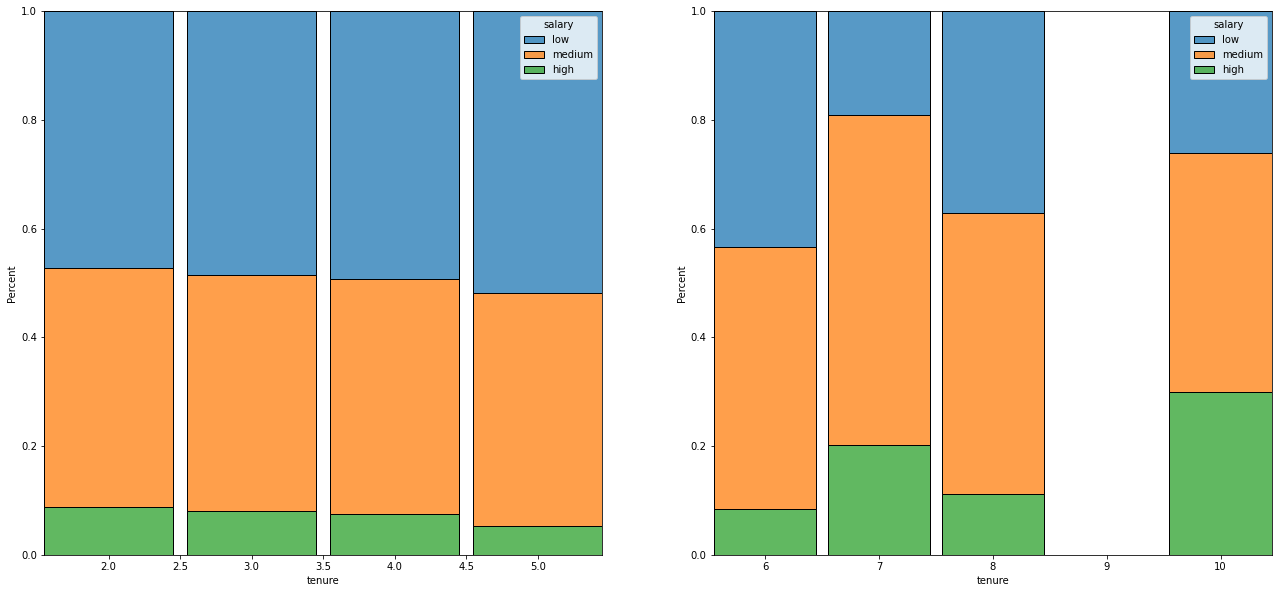

In [22]:
##### Create a plot as needed
### YOUR CODE HERE ###

# Create histogram showing distribution of `salary`
fig, ax = plt.subplots(1, 2, figsize = (22,10))
sns.histplot(data=df0_clean[df0_clean['tenure'] <= 5], x='tenure', hue='salary', hue_order=['low', 'medium', 'high'], multiple='fill', stat='percent', shrink=0.9, discrete=True, ax=ax[0])
sns.histplot(data=df0_clean[df0_clean['tenure'] > 5], x='tenure', hue='salary', hue_order=['low', 'medium', 'high'], multiple='fill', stat='percent', shrink=0.9, discrete=True, ax=ax[1])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

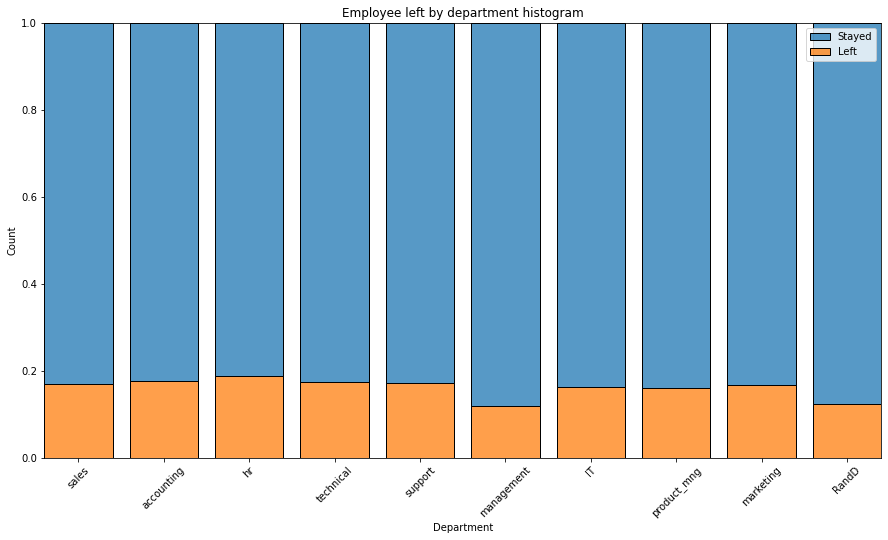

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,8))
ax = sns.histplot(df0_clean, x='department', hue='left', multiple='fill', shrink=0.8, discrete=True)
plt.title('Employee left by department histogram');
ax.legend_.set_title(None)
ax.legend_.texts[0].set_text('Stayed')
ax.legend_.texts[1].set_text('Left')
plt.xlabel('Department')
plt.xticks(rotation=45)


### Insights

The EDA suggests long working hours, too many projects, and low satisfaction score are possible reasons of why employees were leaving the company. The long working hours appear to have influence on the low satifaction score.

Those high performers (with high evaluation score) tends to leave after worked for 3 to 5 years, while low performers would leave after worked for 2 years.

For employees stayed after 6 years, their salary is relative higher than those worked for less than 6 years.

The percent of employees left seems to be similar for different departments, despite management and R&D has sightly less proportion of employees leaving. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn’t leave).


### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, we can either build a Logistic Regression model, or a Tree-based Machine Learning model, or both to compare which model is better.

### Modeling #1 - Logistic Regression

Add as many cells as you need to conduct the modeling process.

In [24]:
### YOUR CODE HERE ###

# Encode 'salary' as ordinal category 
df_subset = df0_clean.copy()
df_subset['salary'] = (df_subset['salary'].astype('category')
                       .cat.set_categories(['low', 'medium', 'high'])
                       .cat.codes
                      )

# Get dummies for 'department'
df_subset = pd.get_dummies(df_subset, columns=['department'], drop_first=False) 
df_subset.head()


,satisfaction_level,last_eval_score,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
# Remove outliers in 'tenure'
df_logreg = df_subset[(df_subset['tenure'] >= lower_limit) & (df_subset['tenure'] <= upper_limit)] 


In [26]:
# Create data set
## Maybe ok to drop 'department' and 'work_accident' from the dependent variables
X = df_logreg.drop(columns=['left'])
y = df_logreg['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42) # Test size = 25%

# Construct logistic regression model and fit the model using training dataset
#clf_logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)
clf_logreg = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [27]:
%%time
# Use the fitted model to get prediction on test dataset
y_pred = clf_logreg.predict(X_test)


CPU times: user 31.4 ms, sys: 31.7 ms, total: 63.1 ms
Wall time: 94 ms


0    0.833959
1    0.166041
Name: left, dtype: float64 

              precision    recall  f1-score   support

      Stayed       0.86      0.93      0.90      2321
        Left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



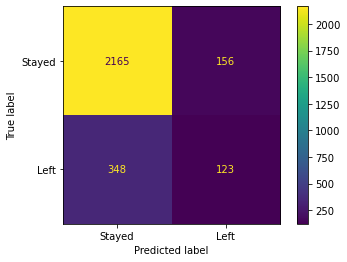

In [28]:
# Evaluate the results

# Look at the skewness of the dataset
print(df_subset['left'].value_counts(normalize=True), '\n')

# Create a classification report
target_labels = ['Stayed', 'Left']
print(metrics.classification_report(y_test, y_pred, target_names=target_labels))

# Create a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=clf_logreg.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Left'])
disp.plot(values_format='')

## Modeling #2 - Random Forest

Add as many cells as you need to conduct the modeling process.

In [29]:
## Re-create dataset from clean set

# Encode 'salary' as ordinal category 
df_rf = df_subset.copy()

# Create data set
## Maybe ok to drop 'department' and 'work_accident' from the dependent variables
X = df_rf.drop(columns=['left'])
y = df_rf['left']

#Create test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)


In [30]:
# Instantiate the Raindom Forest classifier
clf_rf1 = RandomForestClassifier(random_state=0)

# Define disctionary of hyperparameters
"""
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

"""
cv_params = {'max_depth': [5, 10, 50], 
             'max_features': ["sqrt"],
             'max_samples': [0.5, 0.9],
             'min_samples_leaf': [0.5, 1],
             'min_samples_split': [0.001, 0.01],
             'n_estimators': [300, 500],
             }  

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
rf1_cv = GridSearchCV(clf_rf1, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [31]:
%%time
# Construct logistic regression model and fit the model using training dataset
rf1_cv.fit(X_train, y_train)


CPU times: user 3min 32s, sys: 0 ns, total: 3min 32s
Wall time: 3min 32s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [32]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and roc auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   'roc_auc': 'mean_test_roc_auc'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc

  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'Model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'roc auc': [roc_auc]
                         })
  
    return table

In [33]:
# Examine best score
rf1_cv.best_score_

0.9804221874955199

In [34]:
# Examine best hyperparamters
rf1_cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 500}

In [35]:
# Create table of results
rf1_cv_results = make_results('Random Forest (#1) cv', rf1_cv, "roc_auc")
results_table = rf1_cv_results
results_table

,Model,precision,recall,F1,accuracy,roc auc
0,Random Forest (#1) cv,0.984028,0.908241,0.94461,0.98232,0.980422


In [37]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.
    In:
        model_name (string): Your choice: how the model will be named in
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data
    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores
    '''
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)
    roc_auc = metrics.roc_auc_score(y_test_data, preds)
    
    table = pd.DataFrame({'Model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'roc auc': [roc_auc]
                         })
    return table

In [38]:
# Get predictions on test dataset
rf1_test_pred = rf1_cv.best_estimator_.predict(X_test)
rf1_test_score = get_test_scores("Random Forest (#1) test", rf1_test_pred, y_test)
results_table = pd.concat([results_table, rf1_test_score], axis=0)
results_table

,Model,precision,recall,F1,accuracy,roc auc
0,Random Forest (#1) cv,0.984028,0.908241,0.944610,0.982320,0.980422
0,Random Forest (#1) test,0.986928,0.909639,0.946708,0.982989,0.953619


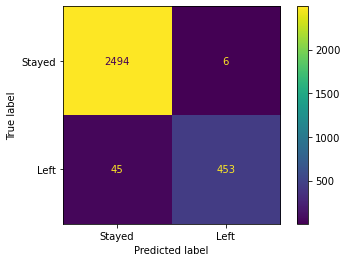

In [39]:
# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, rf1_test_pred, labels=rf1_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Left'])
disp.plot(values_format='')

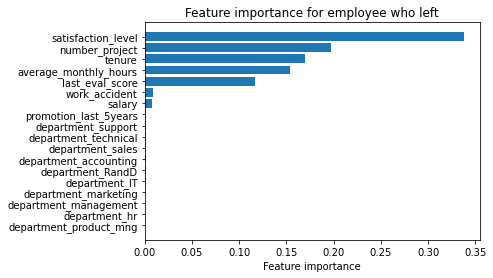

<Figure size 1440x720 with 0 Axes>

In [40]:
# Plot a graphic showing the importance of different features
rf1_importances = rf1_cv.best_estimator_.feature_importances_
feat_importances = pd.Series(rf1_importances, index=X.columns).sort_values()
fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
ax.barh(feat_importances.index, feat_importances)
ax.set_xlabel('Feature importance')
ax.set_title('Feature importance for employee who left')
plt.show()


In [41]:
# Write pickle 
path = '/home/jovyan/work/'
filename = 'rf_model_1'
with open(path + filename + '.pickle', 'wb') as to_write:
        pickle.dump(rf1_cv, to_write)

## Modeling #3 - Random Forest with feature engineering

Add as many cells as you need to conduct the modeling process.

In [42]:
## Re-create dataset from clean set

# Encode 'salary' as ordinal category 
df_rf2 = df_subset.copy()

# Define if employee is overworked
# Assume normal working hours per month = 40 hours/week * 49 weeks / 12 months
df_rf2['overworked'] = (np.where((df_rf2['average_monthly_hours'] > average_working_hours), 1, 0)
                        .astype(int)
                       )

# Drop irrelevant columns
remove_list = [i for i in df_rf2.columns if i.startswith('department')] + ['average_monthly_hours']
df_rf2 = df_rf2.drop(columns=remove_list)

# Create data set
## Maybe ok to drop 'department' and 'work_accident' from the dependent variables
X = df_rf2.drop(columns=['left'])
y = df_rf2['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)





In [47]:
# Instantiate the Raindom Forest classifier
clf_rf2 = RandomForestClassifier(random_state=0)

# Define disctionary of hyperparameters
"""cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  
"""
cv_params = {'max_depth': [5, 10, 50], 
             'max_features': ["sqrt"],
             'max_samples': [0.5, 0.9],
             'min_samples_leaf': [0.5, 1],
             'min_samples_split': [0.001, 0.01],
             'n_estimators': [300, 500],
             }  


# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
rf2_cv = GridSearchCV(clf_rf2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [48]:
%%time
# Construct logistic regression model and fit the model using training dataset
rf2_cv.fit(X_train, y_train)


CPU times: user 3min 10s, sys: 0 ns, total: 3min 10s
Wall time: 3min 11s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [49]:
# Examine best score
rf2_cv.best_score_

0.9790381571590372

In [50]:
# Examine best hyperparamters
rf2_cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 300}

In [51]:
# Create table of results
rf2_cv_results = make_results('Random Forest (#2) cv', rf2_cv, "roc_auc")
results_table = pd.concat([results_table, rf2_cv_results], axis=0)
results_table

,Model,precision,recall,F1,accuracy,roc auc
0,Random Forest (#1) cv,0.984028,0.908241,0.944610,0.982320,0.980422
0,Random Forest (#1) test,0.986928,0.909639,0.946708,0.982989,0.953619
0,Random Forest (#2) cv,0.978352,0.906240,0.940865,0.981097,0.979038


In [52]:
# Get predictions on test dataset
rf2_test_pred = rf2_cv.best_estimator_.predict(X_test)
rf2_test_score = get_test_scores("Random Forest (#2) test", rf2_test_pred, y_test)
results_table = pd.concat([results_table, rf2_test_score], axis=0)
results_table

,Model,precision,recall,F1,accuracy,roc auc
0,Random Forest (#1) cv,0.984028,0.908241,0.944610,0.982320,0.980422
0,Random Forest (#1) test,0.986928,0.909639,0.946708,0.982989,0.953619
0,Random Forest (#2) cv,0.978352,0.906240,0.940865,0.981097,0.979038
0,Random Forest (#2) test,0.978355,0.907631,0.941667,0.981321,0.951815


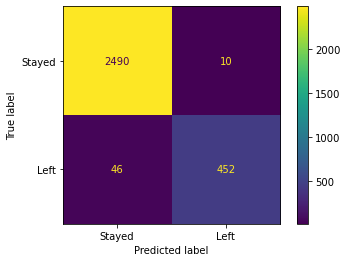

In [53]:
# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, rf2_test_pred, labels=rf2_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Left'])
disp.plot(values_format='')

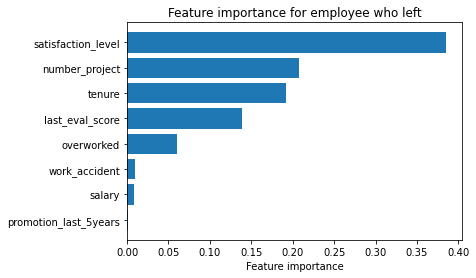

<Figure size 1440x720 with 0 Axes>

In [54]:
# Plot a graphic showing the importance of different features

rf2_importances = rf2_cv.best_estimator_.feature_importances_
feat_importances = pd.Series(rf2_importances, index=X.columns).sort_values()
fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
ax.barh(feat_importances.index, feat_importances)
ax.set_xlabel('Feature importance')
ax.set_title('Feature importance for employee who left')
plt.show()


In [55]:
# Write pickle 
path = '/home/jovyan/work/'
filename = 'rf_model_2'
with open(path + filename + '.pickle', 'wb') as to_write:
        pickle.dump(rf2_cv, to_write)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regression model has a precision of 79%, recall of 82%, F1 score of 80% and accuracy of 82% on the test dataset.

The random forest model with feature engineering has achieved AUC of %, precision of %, recall of %, F1 score of %, and accuracy of % on the test dataset. 

The random forest model slightly outperformed the logistic regression model.

### Conclusion, Recommendations, Next Steps

The feature importance extracted from the Random Forest model suggests that overwork is a major reason which employees decided to leave the company.

It is recommended the company to solve the problem of employee overwork, such as:
1. Reduce/cap the number of hours for employees, or reward for working longer hours
2. Reduce/cap the number of projects that employee can work on at the same time
3. Promote high performers who have been worked for the company for at least 4 years
4. Setup focus group to investigate how to reduce workload

Next steps:
Consider how predictions change when last_eval_score and satisfaction_level removed from the data. 
A low evaluation score may lead to employee's departure, whether voluntarily or involuntarily. 
Also, the company may not have satisfaction levels reported for all employees.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.